1. Import các thư viện cần thiết

In [3]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


2. Thiết lập và huấn luyện mô hình

Epoch 1/10


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8347 - loss: 0.5497 - val_accuracy: 0.9745 - val_loss: 0.0794
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9760 - loss: 0.0799 - val_accuracy: 0.9872 - val_loss: 0.0410
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9838 - loss: 0.0519 - val_accuracy: 0.9863 - val_loss: 0.0412
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9888 - loss: 0.0365 - val_accuracy: 0.9892 - val_loss: 0.0329
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9914 - loss: 0.0264 - val_accuracy: 0.9900 - val_loss: 0.0345
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9931 - loss: 0.0212 - val_accuracy: 0.9910 - val_loss: 0.0290
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9947 - loss: 0.0161 - val_accuracy: 0.9893 - val_loss: 0.0327
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9960 - loss: 0.0140 - val_accuracy: 0.9913 - val

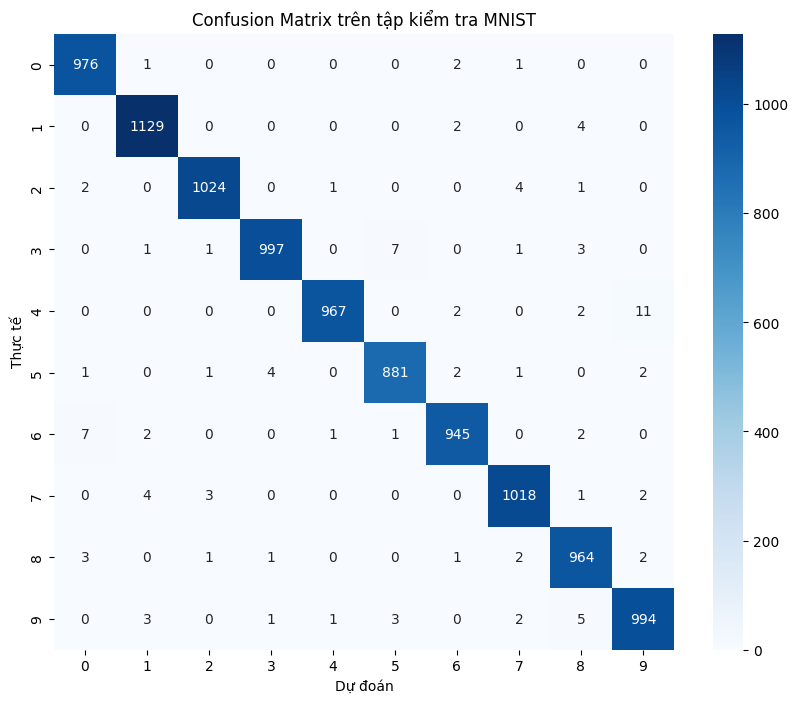

In [4]:
import tensorflow as tf
import numpy as np

# Decide if to load an existing model or to train a new one
train_new_model = True

if train_new_model:
    # Loading the MNIST data set with samples and splitting it
    mnist = tf.keras.datasets.mnist
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Normalizing the data (making length = 1)
    X_train = tf.keras.utils.normalize(X_train, axis=1)
    X_test = tf.keras.utils.normalize(X_test, axis=1)

    # Reshape data để thêm chiều kênh cho CNN (28, 28, 1)
    X_train = X_train[..., np.newaxis]  # Từ (60000, 28, 28) thành (60000, 28, 28, 1)
    X_test = X_test[..., np.newaxis]    # Từ (10000, 28, 28) thành (10000, 28, 28, 1)

    # Create a CNN model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),  # Tắt 20% nơ-ron ngẫu nhiên
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    # Compiling and optimizing model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

    # Các tùy chọn khác (bạn có thể thử nếu muốn)
    # model.compile(optimizer='sgd',
    #               loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    #               loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Training the model
    history = model.fit(X_train, y_train, epochs=10,batch_size=128, 
                        validation_data=(X_test, y_test))

    # Evaluating the model
    val_loss, val_acc = model.evaluate(X_test, y_test)
    print("Validation Loss:", val_loss)
    print("Validation Accuracy:", val_acc)
    
    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Lấy lớp dự đoán (0-9)
    # Tính confusion matrix
    cm = confusion_matrix(y_test, y_pred_classes)

    # Hiển thị confusion matrix bằng heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=range(10), yticklabels=range(10))
    plt.title('Confusion Matrix trên tập kiểm tra MNIST')
    plt.xlabel('Dự đoán')
    plt.ylabel('Thực tế')
    plt.show()
    # Saving the model
    model.save('../handwritten_digits.keras')
else:
    # Load the model
    model = tf.keras.models.load_model('../handwritten_digits.keras',
                                       custom_objects={'softmax_v2': tf.keras.activations.softmax})

3. Vẽ biểu đồ accuracy và loss

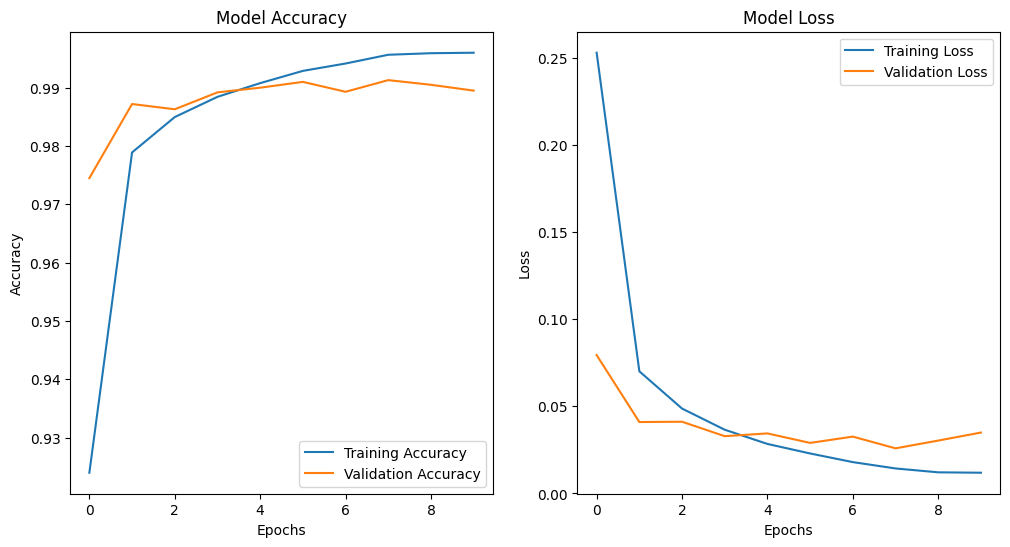

In [5]:
# Plotting accuracy and loss
# Accuracy plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
